<a href="https://colab.research.google.com/github/aoc-ptctech/allinone2022/blob/main/jcplessis/Day_14.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [162]:
import sys 
import numpy as np

class SandPit:
  
  def __init__(self, input, with_bottom=False):
    self.with_bottom = with_bottom
    self.compute_dimensions(input)
    self.compute_world(input)

  def compute_world(self, input):
    self.world = np.chararray((self.max_x+1, self.max_y+1))
    self.world.fill("")
    for line in  input.split("\n"):
      coords = line.split(" -> ")
      for i in range(len(coords) -1):
        from_x, from_y = [int(z) for z in coords[i].split(",")]
        to_x, to_y = [int(z) for z in coords[i+1].split(",")]
        if from_x > to_x:
          from_x, to_x = to_x, from_x
        if from_y > to_y:
          from_y, to_y = to_y, from_y
        
        for x in range(from_x, to_x+1):
          for y in range(from_y, to_y+1):
            self.world[x, y] = "#"

    if self.with_bottom:
      for x in range(self.min_x, self.max_x+1):
        self.world[x, self.max_y] = "#"


  def compute_dimensions(self, input):
    self.min_x = sys.maxsize
    self.max_x = 0
    self.min_y = 0
    self.max_y = 0
    
    for line in  input.split("\n"):
      for coord in line.split(" -> "):
        x, y = [int(z) for z in coord.split(",")]
        self.max_x = max(self.max_x, x)
        self.min_x = min(self.min_x, x)
        self.max_y = max(self.max_y, y)

    if self.with_bottom:
      self.max_y += 2
      self.max_x = max(self.max_x, 500 + self.max_y)
      self.min_x = min(self.min_x, 500 - self.max_y)

  def drop_sand(self):
    x, y = (500, 0)
    while y < self.max_y:
      if self.world[x, y + 1] == "":
        y = y + 1
      else:
        if self.world[x - 1, y + 1] == "":
          y = y + 1
          x = x - 1
        else:
          if self.world[x + 1, y + 1] == "":
            y = y + 1
            x = x + 1
          else:
            self.world[x, y] = "o"
            return (x, y)
    return None

  def fill(self):
    result = 0
    while self.drop_sand() not in (None, (500, 0)):
      result += 1
    if self.with_bottom:
      result += 1
    return result

In [163]:
import unittest

example = """498,4 -> 498,6 -> 496,6
503,4 -> 502,4 -> 502,9 -> 494,9"""

class TestAcceptance(unittest.TestCase):

    def test_dimensions(self):
      sandPit = SandPit(example)
      self.assertEqual(494, sandPit.min_x)
      self.assertEqual(503, sandPit.max_x)
      self.assertEqual(0, sandPit.min_y)
      self.assertEqual(9, sandPit.max_y)

    def test_create_rock(self):
      sandPit = SandPit(example)
      self.assertEqual(b"#", sandPit.world[498,4])
      self.assertEqual(b"#", sandPit.world[498,5])

    def test_drop_sand(self):
      sandPit = SandPit(example)
      self.assertEqual("", sandPit.world[500, 8])
      self.assertEqual(b"#", sandPit.world[500, 9])
      result = sandPit.drop_sand()
      self.assertEqual((500, 8), result)      
      self.assertEqual(b"o", sandPit.world[500, 8])
      self.assertEqual("", sandPit.world[499, 8])
      self.assertEqual(b"#", sandPit.world[499, 9])
      result = sandPit.drop_sand()
      self.assertEqual((499, 8), result)      
      self.assertEqual(b"o", sandPit.world[499, 8])
      self.assertEqual("", sandPit.world[501, 8])
      self.assertEqual(b"#", sandPit.world[501, 9])
      result = sandPit.drop_sand()
      self.assertEqual((501, 8), result)      
      self.assertEqual(b"o", sandPit.world[501, 8])

    def test_fill(self):
      sandPit = SandPit(example)
      result = sandPit.fill()
      self.assertEqual(24, result)

    def test_fill_with_bottom(self):
      sandPit = SandPit(example, with_bottom=True)
      result = sandPit.fill()
      self.assertEqual(93, result)

unittest.main(argv=[''], verbosity=2, exit=False)

test_create_rock (__main__.TestAcceptance) ... ok
test_dimensions (__main__.TestAcceptance) ... ok
test_drop_sand (__main__.TestAcceptance) ... ok
test_fill (__main__.TestAcceptance) ... ok
test_fill_with_bottom (__main__.TestAcceptance) ... ok

----------------------------------------------------------------------
Ran 5 tests in 0.018s

OK


In [164]:
#@title Define my input
input = """480,150 -> 485,150
459,100 -> 464,100
448,94 -> 448,87 -> 448,94 -> 450,94 -> 450,93 -> 450,94 -> 452,94 -> 452,91 -> 452,94 -> 454,94 -> 454,88 -> 454,94 -> 456,94 -> 456,91 -> 456,94 -> 458,94 -> 458,86 -> 458,94 -> 460,94 -> 460,86 -> 460,94 -> 462,94 -> 462,89 -> 462,94 -> 464,94 -> 464,90 -> 464,94
464,163 -> 464,158 -> 464,163 -> 466,163 -> 466,154 -> 466,163 -> 468,163 -> 468,153 -> 468,163 -> 470,163 -> 470,160 -> 470,163 -> 472,163 -> 472,162 -> 472,163 -> 474,163 -> 474,159 -> 474,163 -> 476,163 -> 476,155 -> 476,163 -> 478,163 -> 478,159 -> 478,163
458,81 -> 458,77 -> 458,81 -> 460,81 -> 460,73 -> 460,81 -> 462,81 -> 462,80 -> 462,81 -> 464,81 -> 464,77 -> 464,81 -> 466,81 -> 466,78 -> 466,81 -> 468,81 -> 468,73 -> 468,81
504,19 -> 508,19
467,59 -> 472,59
463,103 -> 468,103
472,68 -> 477,68
472,176 -> 472,175 -> 472,176 -> 474,176 -> 474,174 -> 474,176 -> 476,176 -> 476,174 -> 476,176 -> 478,176 -> 478,175 -> 478,176 -> 480,176 -> 480,166 -> 480,176 -> 482,176 -> 482,172 -> 482,176 -> 484,176 -> 484,167 -> 484,176
470,103 -> 475,103
479,36 -> 479,40 -> 477,40 -> 477,48 -> 489,48 -> 489,40 -> 483,40 -> 483,36
448,94 -> 448,87 -> 448,94 -> 450,94 -> 450,93 -> 450,94 -> 452,94 -> 452,91 -> 452,94 -> 454,94 -> 454,88 -> 454,94 -> 456,94 -> 456,91 -> 456,94 -> 458,94 -> 458,86 -> 458,94 -> 460,94 -> 460,86 -> 460,94 -> 462,94 -> 462,89 -> 462,94 -> 464,94 -> 464,90 -> 464,94
448,94 -> 448,87 -> 448,94 -> 450,94 -> 450,93 -> 450,94 -> 452,94 -> 452,91 -> 452,94 -> 454,94 -> 454,88 -> 454,94 -> 456,94 -> 456,91 -> 456,94 -> 458,94 -> 458,86 -> 458,94 -> 460,94 -> 460,86 -> 460,94 -> 462,94 -> 462,89 -> 462,94 -> 464,94 -> 464,90 -> 464,94
467,128 -> 467,132 -> 462,132 -> 462,138 -> 477,138 -> 477,132 -> 472,132 -> 472,128
464,163 -> 464,158 -> 464,163 -> 466,163 -> 466,154 -> 466,163 -> 468,163 -> 468,153 -> 468,163 -> 470,163 -> 470,160 -> 470,163 -> 472,163 -> 472,162 -> 472,163 -> 474,163 -> 474,159 -> 474,163 -> 476,163 -> 476,155 -> 476,163 -> 478,163 -> 478,159 -> 478,163
452,112 -> 458,112 -> 458,111
460,115 -> 460,117 -> 456,117 -> 456,125 -> 469,125 -> 469,117 -> 464,117 -> 464,115
486,25 -> 490,25
471,109 -> 476,109
467,179 -> 467,180 -> 472,180 -> 472,179
487,150 -> 492,150
501,16 -> 505,16
448,94 -> 448,87 -> 448,94 -> 450,94 -> 450,93 -> 450,94 -> 452,94 -> 452,91 -> 452,94 -> 454,94 -> 454,88 -> 454,94 -> 456,94 -> 456,91 -> 456,94 -> 458,94 -> 458,86 -> 458,94 -> 460,94 -> 460,86 -> 460,94 -> 462,94 -> 462,89 -> 462,94 -> 464,94 -> 464,90 -> 464,94
472,176 -> 472,175 -> 472,176 -> 474,176 -> 474,174 -> 474,176 -> 476,176 -> 476,174 -> 476,176 -> 478,176 -> 478,175 -> 478,176 -> 480,176 -> 480,166 -> 480,176 -> 482,176 -> 482,172 -> 482,176 -> 484,176 -> 484,167 -> 484,176
479,36 -> 479,40 -> 477,40 -> 477,48 -> 489,48 -> 489,40 -> 483,40 -> 483,36
458,81 -> 458,77 -> 458,81 -> 460,81 -> 460,73 -> 460,81 -> 462,81 -> 462,80 -> 462,81 -> 464,81 -> 464,77 -> 464,81 -> 466,81 -> 466,78 -> 466,81 -> 468,81 -> 468,73 -> 468,81
464,109 -> 469,109
448,94 -> 448,87 -> 448,94 -> 450,94 -> 450,93 -> 450,94 -> 452,94 -> 452,91 -> 452,94 -> 454,94 -> 454,88 -> 454,94 -> 456,94 -> 456,91 -> 456,94 -> 458,94 -> 458,86 -> 458,94 -> 460,94 -> 460,86 -> 460,94 -> 462,94 -> 462,89 -> 462,94 -> 464,94 -> 464,90 -> 464,94
472,176 -> 472,175 -> 472,176 -> 474,176 -> 474,174 -> 474,176 -> 476,176 -> 476,174 -> 476,176 -> 478,176 -> 478,175 -> 478,176 -> 480,176 -> 480,166 -> 480,176 -> 482,176 -> 482,172 -> 482,176 -> 484,176 -> 484,167 -> 484,176
489,22 -> 493,22
458,81 -> 458,77 -> 458,81 -> 460,81 -> 460,73 -> 460,81 -> 462,81 -> 462,80 -> 462,81 -> 464,81 -> 464,77 -> 464,81 -> 466,81 -> 466,78 -> 466,81 -> 468,81 -> 468,73 -> 468,81
460,115 -> 460,117 -> 456,117 -> 456,125 -> 469,125 -> 469,117 -> 464,117 -> 464,115
471,55 -> 471,56 -> 479,56
458,81 -> 458,77 -> 458,81 -> 460,81 -> 460,73 -> 460,81 -> 462,81 -> 462,80 -> 462,81 -> 464,81 -> 464,77 -> 464,81 -> 466,81 -> 466,78 -> 466,81 -> 468,81 -> 468,73 -> 468,81
498,25 -> 502,25
467,128 -> 467,132 -> 462,132 -> 462,138 -> 477,138 -> 477,132 -> 472,132 -> 472,128
464,163 -> 464,158 -> 464,163 -> 466,163 -> 466,154 -> 466,163 -> 468,163 -> 468,153 -> 468,163 -> 470,163 -> 470,160 -> 470,163 -> 472,163 -> 472,162 -> 472,163 -> 474,163 -> 474,159 -> 474,163 -> 476,163 -> 476,155 -> 476,163 -> 478,163 -> 478,159 -> 478,163
498,13 -> 502,13
472,176 -> 472,175 -> 472,176 -> 474,176 -> 474,174 -> 474,176 -> 476,176 -> 476,174 -> 476,176 -> 478,176 -> 478,175 -> 478,176 -> 480,176 -> 480,166 -> 480,176 -> 482,176 -> 482,172 -> 482,176 -> 484,176 -> 484,167 -> 484,176
464,163 -> 464,158 -> 464,163 -> 466,163 -> 466,154 -> 466,163 -> 468,163 -> 468,153 -> 468,163 -> 470,163 -> 470,160 -> 470,163 -> 472,163 -> 472,162 -> 472,163 -> 474,163 -> 474,159 -> 474,163 -> 476,163 -> 476,155 -> 476,163 -> 478,163 -> 478,159 -> 478,163
472,144 -> 477,144
466,150 -> 471,150
479,36 -> 479,40 -> 477,40 -> 477,48 -> 489,48 -> 489,40 -> 483,40 -> 483,36
458,81 -> 458,77 -> 458,81 -> 460,81 -> 460,73 -> 460,81 -> 462,81 -> 462,80 -> 462,81 -> 464,81 -> 464,77 -> 464,81 -> 466,81 -> 466,78 -> 466,81 -> 468,81 -> 468,73 -> 468,81
507,22 -> 511,22
467,128 -> 467,132 -> 462,132 -> 462,138 -> 477,138 -> 477,132 -> 472,132 -> 472,128
464,163 -> 464,158 -> 464,163 -> 466,163 -> 466,154 -> 466,163 -> 468,163 -> 468,153 -> 468,163 -> 470,163 -> 470,160 -> 470,163 -> 472,163 -> 472,162 -> 472,163 -> 474,163 -> 474,159 -> 474,163 -> 476,163 -> 476,155 -> 476,163 -> 478,163 -> 478,159 -> 478,163
458,81 -> 458,77 -> 458,81 -> 460,81 -> 460,73 -> 460,81 -> 462,81 -> 462,80 -> 462,81 -> 464,81 -> 464,77 -> 464,81 -> 466,81 -> 466,78 -> 466,81 -> 468,81 -> 468,73 -> 468,81
479,36 -> 479,40 -> 477,40 -> 477,48 -> 489,48 -> 489,40 -> 483,40 -> 483,36
498,19 -> 502,19
458,81 -> 458,77 -> 458,81 -> 460,81 -> 460,73 -> 460,81 -> 462,81 -> 462,80 -> 462,81 -> 464,81 -> 464,77 -> 464,81 -> 466,81 -> 466,78 -> 466,81 -> 468,81 -> 468,73 -> 468,81
472,176 -> 472,175 -> 472,176 -> 474,176 -> 474,174 -> 474,176 -> 476,176 -> 476,174 -> 476,176 -> 478,176 -> 478,175 -> 478,176 -> 480,176 -> 480,166 -> 480,176 -> 482,176 -> 482,172 -> 482,176 -> 484,176 -> 484,167 -> 484,176
458,68 -> 463,68
458,81 -> 458,77 -> 458,81 -> 460,81 -> 460,73 -> 460,81 -> 462,81 -> 462,80 -> 462,81 -> 464,81 -> 464,77 -> 464,81 -> 466,81 -> 466,78 -> 466,81 -> 468,81 -> 468,73 -> 468,81
448,94 -> 448,87 -> 448,94 -> 450,94 -> 450,93 -> 450,94 -> 452,94 -> 452,91 -> 452,94 -> 454,94 -> 454,88 -> 454,94 -> 456,94 -> 456,91 -> 456,94 -> 458,94 -> 458,86 -> 458,94 -> 460,94 -> 460,86 -> 460,94 -> 462,94 -> 462,89 -> 462,94 -> 464,94 -> 464,90 -> 464,94
472,176 -> 472,175 -> 472,176 -> 474,176 -> 474,174 -> 474,176 -> 476,176 -> 476,174 -> 476,176 -> 478,176 -> 478,175 -> 478,176 -> 480,176 -> 480,166 -> 480,176 -> 482,176 -> 482,172 -> 482,176 -> 484,176 -> 484,167 -> 484,176
475,65 -> 480,65
458,81 -> 458,77 -> 458,81 -> 460,81 -> 460,73 -> 460,81 -> 462,81 -> 462,80 -> 462,81 -> 464,81 -> 464,77 -> 464,81 -> 466,81 -> 466,78 -> 466,81 -> 468,81 -> 468,73 -> 468,81
448,94 -> 448,87 -> 448,94 -> 450,94 -> 450,93 -> 450,94 -> 452,94 -> 452,91 -> 452,94 -> 454,94 -> 454,88 -> 454,94 -> 456,94 -> 456,91 -> 456,94 -> 458,94 -> 458,86 -> 458,94 -> 460,94 -> 460,86 -> 460,94 -> 462,94 -> 462,89 -> 462,94 -> 464,94 -> 464,90 -> 464,94
492,19 -> 496,19
448,94 -> 448,87 -> 448,94 -> 450,94 -> 450,93 -> 450,94 -> 452,94 -> 452,91 -> 452,94 -> 454,94 -> 454,88 -> 454,94 -> 456,94 -> 456,91 -> 456,94 -> 458,94 -> 458,86 -> 458,94 -> 460,94 -> 460,86 -> 460,94 -> 462,94 -> 462,89 -> 462,94 -> 464,94 -> 464,90 -> 464,94
472,176 -> 472,175 -> 472,176 -> 474,176 -> 474,174 -> 474,176 -> 476,176 -> 476,174 -> 476,176 -> 478,176 -> 478,175 -> 478,176 -> 480,176 -> 480,166 -> 480,176 -> 482,176 -> 482,172 -> 482,176 -> 484,176 -> 484,167 -> 484,176
464,163 -> 464,158 -> 464,163 -> 466,163 -> 466,154 -> 466,163 -> 468,163 -> 468,153 -> 468,163 -> 470,163 -> 470,160 -> 470,163 -> 472,163 -> 472,162 -> 472,163 -> 474,163 -> 474,159 -> 474,163 -> 476,163 -> 476,155 -> 476,163 -> 478,163 -> 478,159 -> 478,163
448,94 -> 448,87 -> 448,94 -> 450,94 -> 450,93 -> 450,94 -> 452,94 -> 452,91 -> 452,94 -> 454,94 -> 454,88 -> 454,94 -> 456,94 -> 456,91 -> 456,94 -> 458,94 -> 458,86 -> 458,94 -> 460,94 -> 460,86 -> 460,94 -> 462,94 -> 462,89 -> 462,94 -> 464,94 -> 464,90 -> 464,94
460,115 -> 460,117 -> 456,117 -> 456,125 -> 469,125 -> 469,117 -> 464,117 -> 464,115
464,163 -> 464,158 -> 464,163 -> 466,163 -> 466,154 -> 466,163 -> 468,163 -> 468,153 -> 468,163 -> 470,163 -> 470,160 -> 470,163 -> 472,163 -> 472,162 -> 472,163 -> 474,163 -> 474,159 -> 474,163 -> 476,163 -> 476,155 -> 476,163 -> 478,163 -> 478,159 -> 478,163
472,176 -> 472,175 -> 472,176 -> 474,176 -> 474,174 -> 474,176 -> 476,176 -> 476,174 -> 476,176 -> 478,176 -> 478,175 -> 478,176 -> 480,176 -> 480,166 -> 480,176 -> 482,176 -> 482,172 -> 482,176 -> 484,176 -> 484,167 -> 484,176
467,128 -> 467,132 -> 462,132 -> 462,138 -> 477,138 -> 477,132 -> 472,132 -> 472,128
464,163 -> 464,158 -> 464,163 -> 466,163 -> 466,154 -> 466,163 -> 468,163 -> 468,153 -> 468,163 -> 470,163 -> 470,160 -> 470,163 -> 472,163 -> 472,162 -> 472,163 -> 474,163 -> 474,159 -> 474,163 -> 476,163 -> 476,155 -> 476,163 -> 478,163 -> 478,159 -> 478,163
458,81 -> 458,77 -> 458,81 -> 460,81 -> 460,73 -> 460,81 -> 462,81 -> 462,80 -> 462,81 -> 464,81 -> 464,77 -> 464,81 -> 466,81 -> 466,78 -> 466,81 -> 468,81 -> 468,73 -> 468,81
466,100 -> 471,100
458,81 -> 458,77 -> 458,81 -> 460,81 -> 460,73 -> 460,81 -> 462,81 -> 462,80 -> 462,81 -> 464,81 -> 464,77 -> 464,81 -> 466,81 -> 466,78 -> 466,81 -> 468,81 -> 468,73 -> 468,81
448,94 -> 448,87 -> 448,94 -> 450,94 -> 450,93 -> 450,94 -> 452,94 -> 452,91 -> 452,94 -> 454,94 -> 454,88 -> 454,94 -> 456,94 -> 456,91 -> 456,94 -> 458,94 -> 458,86 -> 458,94 -> 460,94 -> 460,86 -> 460,94 -> 462,94 -> 462,89 -> 462,94 -> 464,94 -> 464,90 -> 464,94
464,62 -> 469,62
472,176 -> 472,175 -> 472,176 -> 474,176 -> 474,174 -> 474,176 -> 476,176 -> 476,174 -> 476,176 -> 478,176 -> 478,175 -> 478,176 -> 480,176 -> 480,166 -> 480,176 -> 482,176 -> 482,172 -> 482,176 -> 484,176 -> 484,167 -> 484,176
456,103 -> 461,103
484,28 -> 484,30 -> 481,30 -> 481,33 -> 488,33 -> 488,30 -> 487,30 -> 487,28
467,179 -> 467,180 -> 472,180 -> 472,179
467,128 -> 467,132 -> 462,132 -> 462,138 -> 477,138 -> 477,132 -> 472,132 -> 472,128
448,94 -> 448,87 -> 448,94 -> 450,94 -> 450,93 -> 450,94 -> 452,94 -> 452,91 -> 452,94 -> 454,94 -> 454,88 -> 454,94 -> 456,94 -> 456,91 -> 456,94 -> 458,94 -> 458,86 -> 458,94 -> 460,94 -> 460,86 -> 460,94 -> 462,94 -> 462,89 -> 462,94 -> 464,94 -> 464,90 -> 464,94
472,176 -> 472,175 -> 472,176 -> 474,176 -> 474,174 -> 474,176 -> 476,176 -> 476,174 -> 476,176 -> 478,176 -> 478,175 -> 478,176 -> 480,176 -> 480,166 -> 480,176 -> 482,176 -> 482,172 -> 482,176 -> 484,176 -> 484,167 -> 484,176
448,94 -> 448,87 -> 448,94 -> 450,94 -> 450,93 -> 450,94 -> 452,94 -> 452,91 -> 452,94 -> 454,94 -> 454,88 -> 454,94 -> 456,94 -> 456,91 -> 456,94 -> 458,94 -> 458,86 -> 458,94 -> 460,94 -> 460,86 -> 460,94 -> 462,94 -> 462,89 -> 462,94 -> 464,94 -> 464,90 -> 464,94
467,106 -> 472,106
464,163 -> 464,158 -> 464,163 -> 466,163 -> 466,154 -> 466,163 -> 468,163 -> 468,153 -> 468,163 -> 470,163 -> 470,160 -> 470,163 -> 472,163 -> 472,162 -> 472,163 -> 474,163 -> 474,159 -> 474,163 -> 476,163 -> 476,155 -> 476,163 -> 478,163 -> 478,159 -> 478,163
472,176 -> 472,175 -> 472,176 -> 474,176 -> 474,174 -> 474,176 -> 476,176 -> 476,174 -> 476,176 -> 478,176 -> 478,175 -> 478,176 -> 480,176 -> 480,166 -> 480,176 -> 482,176 -> 482,172 -> 482,176 -> 484,176 -> 484,167 -> 484,176
474,50 -> 474,51 -> 486,51
468,65 -> 473,65
448,94 -> 448,87 -> 448,94 -> 450,94 -> 450,93 -> 450,94 -> 452,94 -> 452,91 -> 452,94 -> 454,94 -> 454,88 -> 454,94 -> 456,94 -> 456,91 -> 456,94 -> 458,94 -> 458,86 -> 458,94 -> 460,94 -> 460,86 -> 460,94 -> 462,94 -> 462,89 -> 462,94 -> 464,94 -> 464,90 -> 464,94
472,176 -> 472,175 -> 472,176 -> 474,176 -> 474,174 -> 474,176 -> 476,176 -> 476,174 -> 476,176 -> 478,176 -> 478,175 -> 478,176 -> 480,176 -> 480,166 -> 480,176 -> 482,176 -> 482,172 -> 482,176 -> 484,176 -> 484,167 -> 484,176
479,68 -> 484,68
476,147 -> 481,147
448,94 -> 448,87 -> 448,94 -> 450,94 -> 450,93 -> 450,94 -> 452,94 -> 452,91 -> 452,94 -> 454,94 -> 454,88 -> 454,94 -> 456,94 -> 456,91 -> 456,94 -> 458,94 -> 458,86 -> 458,94 -> 460,94 -> 460,86 -> 460,94 -> 462,94 -> 462,89 -> 462,94 -> 464,94 -> 464,90 -> 464,94
453,106 -> 458,106
448,94 -> 448,87 -> 448,94 -> 450,94 -> 450,93 -> 450,94 -> 452,94 -> 452,91 -> 452,94 -> 454,94 -> 454,88 -> 454,94 -> 456,94 -> 456,91 -> 456,94 -> 458,94 -> 458,86 -> 458,94 -> 460,94 -> 460,86 -> 460,94 -> 462,94 -> 462,89 -> 462,94 -> 464,94 -> 464,90 -> 464,94
484,28 -> 484,30 -> 481,30 -> 481,33 -> 488,33 -> 488,30 -> 487,30 -> 487,28
464,163 -> 464,158 -> 464,163 -> 466,163 -> 466,154 -> 466,163 -> 468,163 -> 468,153 -> 468,163 -> 470,163 -> 470,160 -> 470,163 -> 472,163 -> 472,162 -> 472,163 -> 474,163 -> 474,159 -> 474,163 -> 476,163 -> 476,155 -> 476,163 -> 478,163 -> 478,159 -> 478,163
484,28 -> 484,30 -> 481,30 -> 481,33 -> 488,33 -> 488,30 -> 487,30 -> 487,28
464,163 -> 464,158 -> 464,163 -> 466,163 -> 466,154 -> 466,163 -> 468,163 -> 468,153 -> 468,163 -> 470,163 -> 470,160 -> 470,163 -> 472,163 -> 472,162 -> 472,163 -> 474,163 -> 474,159 -> 474,163 -> 476,163 -> 476,155 -> 476,163 -> 478,163 -> 478,159 -> 478,163
483,147 -> 488,147
472,176 -> 472,175 -> 472,176 -> 474,176 -> 474,174 -> 474,176 -> 476,176 -> 476,174 -> 476,176 -> 478,176 -> 478,175 -> 478,176 -> 480,176 -> 480,166 -> 480,176 -> 482,176 -> 482,172 -> 482,176 -> 484,176 -> 484,167 -> 484,176
501,22 -> 505,22
465,68 -> 470,68
479,144 -> 484,144
484,28 -> 484,30 -> 481,30 -> 481,33 -> 488,33 -> 488,30 -> 487,30 -> 487,28
484,28 -> 484,30 -> 481,30 -> 481,33 -> 488,33 -> 488,30 -> 487,30 -> 487,28
472,176 -> 472,175 -> 472,176 -> 474,176 -> 474,174 -> 474,176 -> 476,176 -> 476,174 -> 476,176 -> 478,176 -> 478,175 -> 478,176 -> 480,176 -> 480,166 -> 480,176 -> 482,176 -> 482,172 -> 482,176 -> 484,176 -> 484,167 -> 484,176
448,94 -> 448,87 -> 448,94 -> 450,94 -> 450,93 -> 450,94 -> 452,94 -> 452,91 -> 452,94 -> 454,94 -> 454,88 -> 454,94 -> 456,94 -> 456,91 -> 456,94 -> 458,94 -> 458,86 -> 458,94 -> 460,94 -> 460,86 -> 460,94 -> 462,94 -> 462,89 -> 462,94 -> 464,94 -> 464,90 -> 464,94
472,176 -> 472,175 -> 472,176 -> 474,176 -> 474,174 -> 474,176 -> 476,176 -> 476,174 -> 476,176 -> 478,176 -> 478,175 -> 478,176 -> 480,176 -> 480,166 -> 480,176 -> 482,176 -> 482,172 -> 482,176 -> 484,176 -> 484,167 -> 484,176
464,163 -> 464,158 -> 464,163 -> 466,163 -> 466,154 -> 466,163 -> 468,163 -> 468,153 -> 468,163 -> 470,163 -> 470,160 -> 470,163 -> 472,163 -> 472,162 -> 472,163 -> 474,163 -> 474,159 -> 474,163 -> 476,163 -> 476,155 -> 476,163 -> 478,163 -> 478,159 -> 478,163
474,106 -> 479,106
458,81 -> 458,77 -> 458,81 -> 460,81 -> 460,73 -> 460,81 -> 462,81 -> 462,80 -> 462,81 -> 464,81 -> 464,77 -> 464,81 -> 466,81 -> 466,78 -> 466,81 -> 468,81 -> 468,73 -> 468,81
471,55 -> 471,56 -> 479,56
448,94 -> 448,87 -> 448,94 -> 450,94 -> 450,93 -> 450,94 -> 452,94 -> 452,91 -> 452,94 -> 454,94 -> 454,88 -> 454,94 -> 456,94 -> 456,91 -> 456,94 -> 458,94 -> 458,86 -> 458,94 -> 460,94 -> 460,86 -> 460,94 -> 462,94 -> 462,89 -> 462,94 -> 464,94 -> 464,90 -> 464,94
475,141 -> 480,141
460,115 -> 460,117 -> 456,117 -> 456,125 -> 469,125 -> 469,117 -> 464,117 -> 464,115
448,94 -> 448,87 -> 448,94 -> 450,94 -> 450,93 -> 450,94 -> 452,94 -> 452,91 -> 452,94 -> 454,94 -> 454,88 -> 454,94 -> 456,94 -> 456,91 -> 456,94 -> 458,94 -> 458,86 -> 458,94 -> 460,94 -> 460,86 -> 460,94 -> 462,94 -> 462,89 -> 462,94 -> 464,94 -> 464,90 -> 464,94
472,176 -> 472,175 -> 472,176 -> 474,176 -> 474,174 -> 474,176 -> 476,176 -> 476,174 -> 476,176 -> 478,176 -> 478,175 -> 478,176 -> 480,176 -> 480,166 -> 480,176 -> 482,176 -> 482,172 -> 482,176 -> 484,176 -> 484,167 -> 484,176
472,176 -> 472,175 -> 472,176 -> 474,176 -> 474,174 -> 474,176 -> 476,176 -> 476,174 -> 476,176 -> 478,176 -> 478,175 -> 478,176 -> 480,176 -> 480,166 -> 480,176 -> 482,176 -> 482,172 -> 482,176 -> 484,176 -> 484,167 -> 484,176
484,28 -> 484,30 -> 481,30 -> 481,33 -> 488,33 -> 488,30 -> 487,30 -> 487,28
464,163 -> 464,158 -> 464,163 -> 466,163 -> 466,154 -> 466,163 -> 468,163 -> 468,153 -> 468,163 -> 470,163 -> 470,160 -> 470,163 -> 472,163 -> 472,162 -> 472,163 -> 474,163 -> 474,159 -> 474,163 -> 476,163 -> 476,155 -> 476,163 -> 478,163 -> 478,159 -> 478,163
457,109 -> 462,109
464,163 -> 464,158 -> 464,163 -> 466,163 -> 466,154 -> 466,163 -> 468,163 -> 468,153 -> 468,163 -> 470,163 -> 470,160 -> 470,163 -> 472,163 -> 472,162 -> 472,163 -> 474,163 -> 474,159 -> 474,163 -> 476,163 -> 476,155 -> 476,163 -> 478,163 -> 478,159 -> 478,163
458,81 -> 458,77 -> 458,81 -> 460,81 -> 460,73 -> 460,81 -> 462,81 -> 462,80 -> 462,81 -> 464,81 -> 464,77 -> 464,81 -> 466,81 -> 466,78 -> 466,81 -> 468,81 -> 468,73 -> 468,81
448,94 -> 448,87 -> 448,94 -> 450,94 -> 450,93 -> 450,94 -> 452,94 -> 452,91 -> 452,94 -> 454,94 -> 454,88 -> 454,94 -> 456,94 -> 456,91 -> 456,94 -> 458,94 -> 458,86 -> 458,94 -> 460,94 -> 460,86 -> 460,94 -> 462,94 -> 462,89 -> 462,94 -> 464,94 -> 464,90 -> 464,94
467,128 -> 467,132 -> 462,132 -> 462,138 -> 477,138 -> 477,132 -> 472,132 -> 472,128
504,25 -> 508,25
458,81 -> 458,77 -> 458,81 -> 460,81 -> 460,73 -> 460,81 -> 462,81 -> 462,80 -> 462,81 -> 464,81 -> 464,77 -> 464,81 -> 466,81 -> 466,78 -> 466,81 -> 468,81 -> 468,73 -> 468,81
464,163 -> 464,158 -> 464,163 -> 466,163 -> 466,154 -> 466,163 -> 468,163 -> 468,153 -> 468,163 -> 470,163 -> 470,160 -> 470,163 -> 472,163 -> 472,162 -> 472,163 -> 474,163 -> 474,159 -> 474,163 -> 476,163 -> 476,155 -> 476,163 -> 478,163 -> 478,159 -> 478,163
448,94 -> 448,87 -> 448,94 -> 450,94 -> 450,93 -> 450,94 -> 452,94 -> 452,91 -> 452,94 -> 454,94 -> 454,88 -> 454,94 -> 456,94 -> 456,91 -> 456,94 -> 458,94 -> 458,86 -> 458,94 -> 460,94 -> 460,86 -> 460,94 -> 462,94 -> 462,89 -> 462,94 -> 464,94 -> 464,90 -> 464,94
495,22 -> 499,22
492,25 -> 496,25
448,94 -> 448,87 -> 448,94 -> 450,94 -> 450,93 -> 450,94 -> 452,94 -> 452,91 -> 452,94 -> 454,94 -> 454,88 -> 454,94 -> 456,94 -> 456,91 -> 456,94 -> 458,94 -> 458,86 -> 458,94 -> 460,94 -> 460,86 -> 460,94 -> 462,94 -> 462,89 -> 462,94 -> 464,94 -> 464,90 -> 464,94
472,176 -> 472,175 -> 472,176 -> 474,176 -> 474,174 -> 474,176 -> 476,176 -> 476,174 -> 476,176 -> 478,176 -> 478,175 -> 478,176 -> 480,176 -> 480,166 -> 480,176 -> 482,176 -> 482,172 -> 482,176 -> 484,176 -> 484,167 -> 484,176
467,128 -> 467,132 -> 462,132 -> 462,138 -> 477,138 -> 477,132 -> 472,132 -> 472,128
460,106 -> 465,106
469,147 -> 474,147
450,109 -> 455,109
464,163 -> 464,158 -> 464,163 -> 466,163 -> 466,154 -> 466,163 -> 468,163 -> 468,153 -> 468,163 -> 470,163 -> 470,160 -> 470,163 -> 472,163 -> 472,162 -> 472,163 -> 474,163 -> 474,159 -> 474,163 -> 476,163 -> 476,155 -> 476,163 -> 478,163 -> 478,159 -> 478,163
452,112 -> 458,112 -> 458,111
461,65 -> 466,65
458,81 -> 458,77 -> 458,81 -> 460,81 -> 460,73 -> 460,81 -> 462,81 -> 462,80 -> 462,81 -> 464,81 -> 464,77 -> 464,81 -> 466,81 -> 466,78 -> 466,81 -> 468,81 -> 468,73 -> 468,81
464,163 -> 464,158 -> 464,163 -> 466,163 -> 466,154 -> 466,163 -> 468,163 -> 468,153 -> 468,163 -> 470,163 -> 470,160 -> 470,163 -> 472,163 -> 472,162 -> 472,163 -> 474,163 -> 474,159 -> 474,163 -> 476,163 -> 476,155 -> 476,163 -> 478,163 -> 478,159 -> 478,163
472,176 -> 472,175 -> 472,176 -> 474,176 -> 474,174 -> 474,176 -> 476,176 -> 476,174 -> 476,176 -> 478,176 -> 478,175 -> 478,176 -> 480,176 -> 480,166 -> 480,176 -> 482,176 -> 482,172 -> 482,176 -> 484,176 -> 484,167 -> 484,176
448,94 -> 448,87 -> 448,94 -> 450,94 -> 450,93 -> 450,94 -> 452,94 -> 452,91 -> 452,94 -> 454,94 -> 454,88 -> 454,94 -> 456,94 -> 456,91 -> 456,94 -> 458,94 -> 458,86 -> 458,94 -> 460,94 -> 460,86 -> 460,94 -> 462,94 -> 462,89 -> 462,94 -> 464,94 -> 464,90 -> 464,94
467,179 -> 467,180 -> 472,180 -> 472,179
464,163 -> 464,158 -> 464,163 -> 466,163 -> 466,154 -> 466,163 -> 468,163 -> 468,153 -> 468,163 -> 470,163 -> 470,160 -> 470,163 -> 472,163 -> 472,162 -> 472,163 -> 474,163 -> 474,159 -> 474,163 -> 476,163 -> 476,155 -> 476,163 -> 478,163 -> 478,159 -> 478,163
460,115 -> 460,117 -> 456,117 -> 456,125 -> 469,125 -> 469,117 -> 464,117 -> 464,115
464,163 -> 464,158 -> 464,163 -> 466,163 -> 466,154 -> 466,163 -> 468,163 -> 468,153 -> 468,163 -> 470,163 -> 470,160 -> 470,163 -> 472,163 -> 472,162 -> 472,163 -> 474,163 -> 474,159 -> 474,163 -> 476,163 -> 476,155 -> 476,163 -> 478,163 -> 478,159 -> 478,163
458,81 -> 458,77 -> 458,81 -> 460,81 -> 460,73 -> 460,81 -> 462,81 -> 462,80 -> 462,81 -> 464,81 -> 464,77 -> 464,81 -> 466,81 -> 466,78 -> 466,81 -> 468,81 -> 468,73 -> 468,81
462,97 -> 467,97
448,94 -> 448,87 -> 448,94 -> 450,94 -> 450,93 -> 450,94 -> 452,94 -> 452,91 -> 452,94 -> 454,94 -> 454,88 -> 454,94 -> 456,94 -> 456,91 -> 456,94 -> 458,94 -> 458,86 -> 458,94 -> 460,94 -> 460,86 -> 460,94 -> 462,94 -> 462,89 -> 462,94 -> 464,94 -> 464,90 -> 464,94
464,163 -> 464,158 -> 464,163 -> 466,163 -> 466,154 -> 466,163 -> 468,163 -> 468,153 -> 468,163 -> 470,163 -> 470,160 -> 470,163 -> 472,163 -> 472,162 -> 472,163 -> 474,163 -> 474,159 -> 474,163 -> 476,163 -> 476,155 -> 476,163 -> 478,163 -> 478,159 -> 478,163
510,25 -> 514,25
495,16 -> 499,16
448,94 -> 448,87 -> 448,94 -> 450,94 -> 450,93 -> 450,94 -> 452,94 -> 452,91 -> 452,94 -> 454,94 -> 454,88 -> 454,94 -> 456,94 -> 456,91 -> 456,94 -> 458,94 -> 458,86 -> 458,94 -> 460,94 -> 460,86 -> 460,94 -> 462,94 -> 462,89 -> 462,94 -> 464,94 -> 464,90 -> 464,94
458,81 -> 458,77 -> 458,81 -> 460,81 -> 460,73 -> 460,81 -> 462,81 -> 462,80 -> 462,81 -> 464,81 -> 464,77 -> 464,81 -> 466,81 -> 466,78 -> 466,81 -> 468,81 -> 468,73 -> 468,81
448,94 -> 448,87 -> 448,94 -> 450,94 -> 450,93 -> 450,94 -> 452,94 -> 452,91 -> 452,94 -> 454,94 -> 454,88 -> 454,94 -> 456,94 -> 456,91 -> 456,94 -> 458,94 -> 458,86 -> 458,94 -> 460,94 -> 460,86 -> 460,94 -> 462,94 -> 462,89 -> 462,94 -> 464,94 -> 464,90 -> 464,94
479,36 -> 479,40 -> 477,40 -> 477,48 -> 489,48 -> 489,40 -> 483,40 -> 483,36
464,163 -> 464,158 -> 464,163 -> 466,163 -> 466,154 -> 466,163 -> 468,163 -> 468,153 -> 468,163 -> 470,163 -> 470,160 -> 470,163 -> 472,163 -> 472,162 -> 472,163 -> 474,163 -> 474,159 -> 474,163 -> 476,163 -> 476,155 -> 476,163 -> 478,163 -> 478,159 -> 478,163
472,176 -> 472,175 -> 472,176 -> 474,176 -> 474,174 -> 474,176 -> 476,176 -> 476,174 -> 476,176 -> 478,176 -> 478,175 -> 478,176 -> 480,176 -> 480,166 -> 480,176 -> 482,176 -> 482,172 -> 482,176 -> 484,176 -> 484,167 -> 484,176
460,115 -> 460,117 -> 456,117 -> 456,125 -> 469,125 -> 469,117 -> 464,117 -> 464,115
448,94 -> 448,87 -> 448,94 -> 450,94 -> 450,93 -> 450,94 -> 452,94 -> 452,91 -> 452,94 -> 454,94 -> 454,88 -> 454,94 -> 456,94 -> 456,91 -> 456,94 -> 458,94 -> 458,86 -> 458,94 -> 460,94 -> 460,86 -> 460,94 -> 462,94 -> 462,89 -> 462,94 -> 464,94 -> 464,90 -> 464,94
479,36 -> 479,40 -> 477,40 -> 477,48 -> 489,48 -> 489,40 -> 483,40 -> 483,36
464,163 -> 464,158 -> 464,163 -> 466,163 -> 466,154 -> 466,163 -> 468,163 -> 468,153 -> 468,163 -> 470,163 -> 470,160 -> 470,163 -> 472,163 -> 472,162 -> 472,163 -> 474,163 -> 474,159 -> 474,163 -> 476,163 -> 476,155 -> 476,163 -> 478,163 -> 478,159 -> 478,163
464,163 -> 464,158 -> 464,163 -> 466,163 -> 466,154 -> 466,163 -> 468,163 -> 468,153 -> 468,163 -> 470,163 -> 470,160 -> 470,163 -> 472,163 -> 472,162 -> 472,163 -> 474,163 -> 474,159 -> 474,163 -> 476,163 -> 476,155 -> 476,163 -> 478,163 -> 478,159 -> 478,163
473,150 -> 478,150
471,62 -> 476,62
484,28 -> 484,30 -> 481,30 -> 481,33 -> 488,33 -> 488,30 -> 487,30 -> 487,28
479,36 -> 479,40 -> 477,40 -> 477,48 -> 489,48 -> 489,40 -> 483,40 -> 483,36
478,109 -> 483,109
474,50 -> 474,51 -> 486,51
460,115 -> 460,117 -> 456,117 -> 456,125 -> 469,125 -> 469,117 -> 464,117 -> 464,115"""


In [165]:
    

print(f"In my sand pit I can store {SandPit(input).fill()} grains of sand.")
print(f"With a bottom, my sand pit can store {SandPit(input, with_bottom=True).fill()} grains of sand.")


In my sand pit I can store 692 grains of sand.
With a bottom, my sand pit can store 31706 grains of sand.


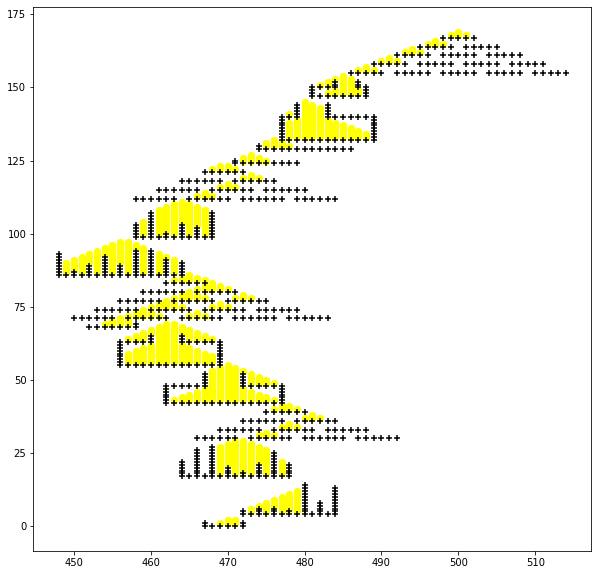

In [166]:
#@title Représentation de la grotte
import numpy as np
import matplotlib.pyplot as plt

sandPit = SandPit(input)
sandPit.fill()

plt.scatter(*(np.fliplr(sandPit.world) == b"o").nonzero(), s=40, c='yellow', marker="o")
plt.scatter(*(np.fliplr(sandPit.world) == b"#").nonzero(), s=40, c='black', marker="+")
plt.rcParams["figure.figsize"] = (10, 10)
plt.show()


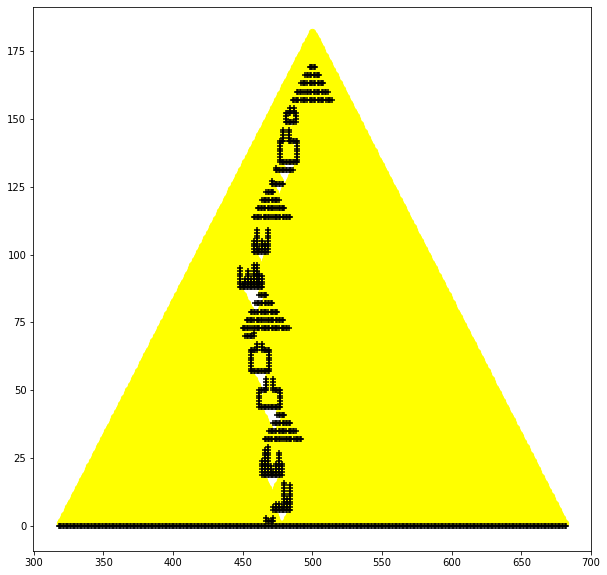

In [167]:
#@title Représentation de la grotte avec un fond
import numpy as np
import matplotlib.pyplot as plt

sandPit = SandPit(input, with_bottom=True)
sandPit.fill()

plt.scatter(*(np.fliplr(sandPit.world) == b"o").nonzero(), s=40, c='yellow', marker="o")
plt.scatter(*(np.fliplr(sandPit.world) == b"#").nonzero(), s=40, c='black', marker="+")
plt.rcParams["figure.figsize"] = (10, 10)
plt.show()
